In [1]:
import os
import sys
from collections import defaultdict

import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import patheffects
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon, Rectangle, FancyBboxPatch
from matplotlib.collections import PatchCollection

sys.path.append('..')
from tools import get_shapes, rgb2rgba
from tools.augmentations import AddDarkness, AddBrightness, AddRain, AddSnow

In [18]:
def draw_plot1(ax, shape):
    image = Image.open('../images/00000957.jpg')
    coord = (0, 0, 400, 397)
    image = image.crop(coord)
    ax.imshow(image)
    for shape in shapes['polygons']:
        if shape['label'] not in ['panel']: 
            points = np.asarray(shape['points'])
            color = colors_map.get(shape['label'], ((0, 0, 0, 1), (0, 0, 0, 1)))
            polygon = Polygon(np.asarray(shape['points']), True, fc=color[0], ec=color[1])
            ax.add_patch(polygon)
            
    ax.tick_params(axis='both', bottom=False, left=False, labelleft=False, labelbottom=False)
    
def draw_plot2(ax, shape):
    image = Image.open('../images/00000957.jpg')
    coord = (0, 0, 400, 397)
    image = image.crop(coord)
    w, h = image.size
#     image = image.resize((int(w*0.8), int(h*0.8)))
    ax.imshow(image, alpha=0.1)
    for shape in shapes['polygons']:
        if shape['label'] == 'person': 
            polygon = np.asarray(shape['points'])
            color = colors_map.get('person', 1)
            patches = Polygon(np.asarray(polygon), True, fc=color[0], ec=color[1])
            ax.add_patch(patches)
            
            line = Line2D(
                np.asarray(polygon)[:, 0], np.asarray(polygon)[:, 1], 
                linewidth=0.5, color='black', markersize=3., marker='o', markeredgecolor='none', markeredgewidth=.5)#markeredgecolor='r')
            ax.add_line(line)
    
    for shape in shapes['boxes']:
        if shape['label'] == 'person': 
            box = np.asarray(shape['points'])

    rectangles = FancyBboxPatch((box[0], box[1]), box[2], box[3], fc=color[0], ec=color[1], boxstyle='square,pad=0.')
    ax.add_patch(rectangles)

    boxes = [
        [box[0], box[1]],
        [box[0]+box[2], box[1]],
        [box[0], box[1]+box[3]],
        [box[0]+box[2], box[1]+box[3]]
    ]

    texts = ['(min x, min y)', '(max x, min y)', '(min x, max y)', '(max x, max y)']
    va = 'bottom'
    offset = -8
    for i, (box, text) in enumerate(zip(boxes, texts)):
        ax.scatter(box[0], box[1], c='g', s=10,)# ec='w', lw=0.5)
        if i > 1:
            va = 'top'
            offset = 8
        ax.annotate(
            text, (box[0], box[1]+offset), color='black', 
            weight='bold', fontsize=5, ha='center', va=va)
        
#     ax.annotate(
#         'Polygon to bound', (80, 60),  xytext=(70, 85), color='black', weight='bold', 
#         fontsize=7, ha='left', va='top', arrowprops={'arrowstyle': '->'})
#     ax.annotate(
#         'Bounding box', (40, 8),  xytext=(2, 20), color='black', weight='bold', 
#         fontsize=7, ha='left', va='top', arrowprops={'arrowstyle': '->'})
    ax.axis('off')
   
    
def draw_plot3(ax, shape):
    image = Image.open('../images/00000957.jpg')
    coord = (0, 0, 400, 397)
    image = image.crop(coord)
    ax.imshow(image)
    for shape in shapes['boxes']:
        if shape['label'] in ['person', 'hardhat']:
            box = shape['points']
            color = color = colors_map.get(shape['label'], ((0, 0, 0, 1), (0, 0, 0, 1)))
            rectangle = Rectangle((box[0], box[1]), box[2], box[3], fc=color[0], ec=color[1])
            ax.add_patch(rectangle)
            
            ax.annotate(
                shape['label'], (box[0], box[1]), color='w', weight='bold', 
                fontsize=5, ha='left', va='bottom', 
                bbox=dict(facecolor=color[1], edgecolor=color[1], pad=0.0))
            
    ax.tick_params(axis='both', bottom=False, left=False, labelleft=False, labelbottom=False)

In [19]:
shapes = get_shapes('../images/00000957.json', xywh=True)

colors_map = {
    'gang form': rgb2rgba((30, 144, 255), 0.5),
    'person': rgb2rgba((0, 128, 0), 0.5),
    'support': rgb2rgba((138, 43, 226), 0.5),
    'hardhat': rgb2rgba((255, 255, 0), 0.5),
    'pallet': rgb2rgba((255, 95, 119), 0.5),
    'concrete pump truck': rgb2rgba((255, 0, 0), 0.5)
}

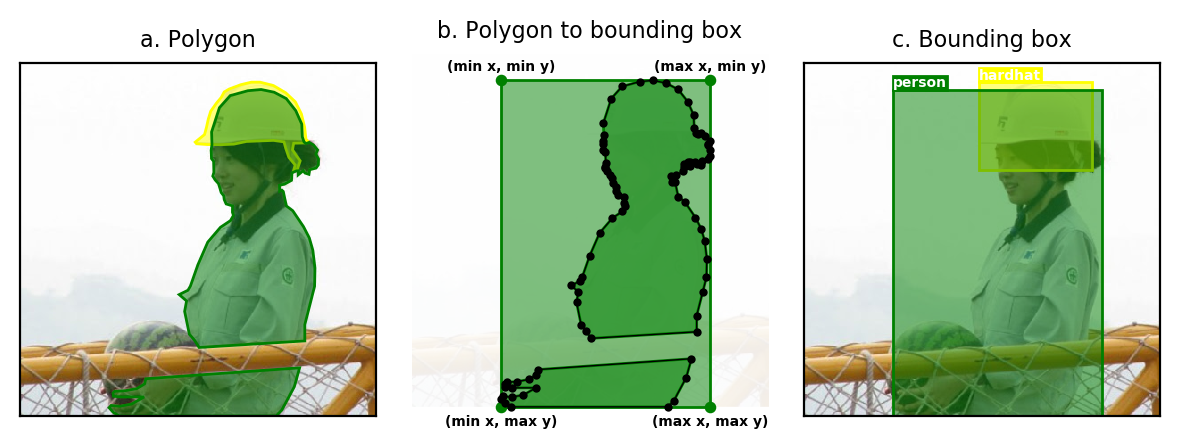

In [21]:
fig, axes = plt.subplots(1, 3, dpi=200)
draw_plot1(axes.flat[0], shapes)
axes.flat[0].set_title('a. Polygon', fontsize=8)

draw_plot2(axes.flat[1], shapes)
axes.flat[1].set_title('b. Polygon to bounding box', fontsize=8)

draw_plot3(axes.flat[2], shapes)
axes.flat[2].set_title('c. Bounding box', fontsize=8)

fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.14)
plt.show()
fig.savefig('./outputs/fig-0204.png', bbox_inches='tight') # pad_inches